# Factor Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ratings-of-acquiantances" data-toc-modified-id="Ratings-of-acquiantances-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ratings of acquiantances</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Determine-appropriate-number-of-common-factors" data-toc-modified-id="Determine-appropriate-number-of-common-factors-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Determine appropriate number of common factors</a></span></li><li><span><a href="#Apply-factor-analysis" data-toc-modified-id="Apply-factor-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Apply factor analysis</a></span></li></ul></li><li><span><a href="#Factor-rotation" data-toc-modified-id="Factor-rotation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Factor rotation</a></span><ul class="toc-item"><li><span><a href="#Fit-model-with-varimax-rotation" data-toc-modified-id="Fit-model-with-varimax-rotation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fit model with varimax rotation</a></span></li><li><span><a href="#Show-factor-loadings" data-toc-modified-id="Show-factor-loadings-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Show factor loadings</a></span></li></ul></li><li><span><a href="#Factor-scores" data-toc-modified-id="Factor-scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Factor scores</a></span></li><li><span><a href="#Your-Turn:-Customer-preference-data" data-toc-modified-id="Your-Turn:-Customer-preference-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><font color="orange">Your Turn: Customer preference data</font></a></span></li></ul></div>

In [1]:
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("RdBu", n_colors=10)

# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
%matplotlib inline   
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm


#pd.options.plotting.backend = "plotly" 
# Conflict with options in original matplotlib.

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)
print('Statsmodels version', sm.__version__)

Numpy version 1.21.6
Pandas version 1.3.5
Seaborn version 0.11.2
Statsmodels version 0.10.2


**Install factor analyzer package first..** 

pip install factor_analyzer

See https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

In [3]:
pip install factor_analyzer

     |████████████████████████████████| 41 kB 295 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=843c818519070770f0b6c7488dbc2e76a08d13f6f14c5ae0364ae558d4abd7d2
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [4]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

## Ratings of acquiantances

### Load data

In [6]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#pd.set_option('display.precision', 4)

ratings_df = pd.DataFrame(data=[[1,5,5,1,1],
                                [8,9,7,9,8],
                                [9,8,9,9,8],
                                [9,9,9,9,9],
                                [1,9,1,1,9],
                                [9,7,7,9,9],
                                [9,7,9,9,7]],
                          columns = ['Kind','Intelligent','Happy','Likable','Just'],
                          index = ['P1','P2','P3','P4','P5','P6','P7'])
ratings_df.corr()
#norm_df = (df - df.mean(axis=0))/df.std(axis=0)
#groups={'Personality':list(df.columns)}

,Kind,Intelligent,Happy,Likable,Just
Kind,1.0000,0.2955,0.8806,0.9954,0.5446
Intelligent,0.2955,1.0000,-0.0217,0.3262,0.8373
Happy,0.8806,-0.0217,1.0000,0.8667,0.1303
Likable,0.9954,0.3262,0.8667,1.0000,0.5440
Just,0.5446,0.8373,0.1303,0.5440,1.0000


### Determine appropriate number of common factors

In [ ]:
import numpy as np

eigval,eigvec=np.linalg.eig(ratings_df.corr())
  
# Sort descendingly
sorted_eigval = -np.sort(-eigval)
sorted_eigval

In [ ]:
plt.plot(sorted_eigval, '-o');

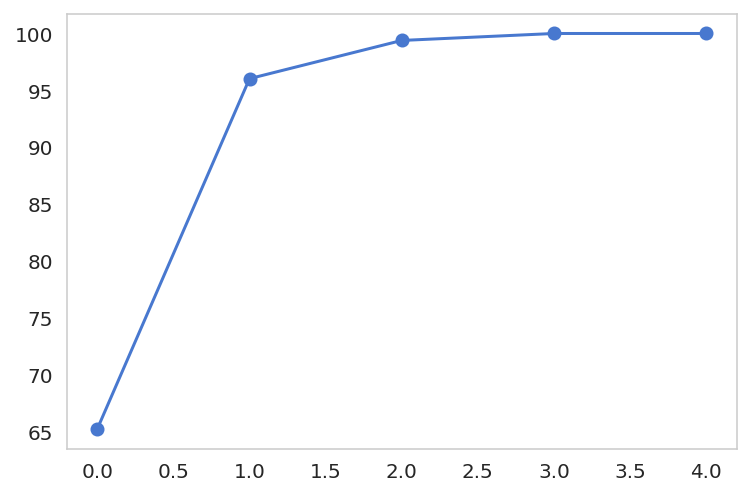

In [ ]:
plt.plot(np.cumsum(sorted_eigval)*100/len(sorted_eigval), '-o');

### Apply factor analysis
Create factor analysis object and perform factor analysis

In [ ]:
import numpy as np
from factor_analyzer import FactorAnalyzer

np.set_printoptions(precision=4)

NUM_FACTORS=2
fa = FactorAnalyzer(n_factors=2,  rotation=None, is_corr_matrix=False)

# Use method='principal'to get the same results as in the textbook.

fa.fit(ratings_df)
print(fa.loadings_)

FactorAnalyzer(n_factors=2, rotation=None, rotation_kwargs={})

[[ 0.9771 -0.2123]
 [ 0.4692  0.7038]
 [ 0.777  -0.5632]
 [ 0.9768 -0.1911]
 [ 0.6994  0.717 ]]


## Factor rotation

### Fit model with varimax rotation

In [ ]:
# Create factor analysis object and perform factor analysis

from factor_analyzer import FactorAnalyzer


NUM_FACTORS=2
fa = FactorAnalyzer(n_factors=NUM_FACTORS,  rotation='varimax') 
fa.fit(ratings_df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

### Show factor loadings

In [ ]:
print(fa.loadings_)

[[ 0.9511  0.3088]
 [ 0.0509  0.8443]
 [ 0.9549 -0.0952]
 [ 0.9401  0.3269]
 [ 0.2431  0.9717]]


## Factor scores

In [ ]:
fa.transform(ratings_df)

array([[-0.9433, -2.1673],
       [ 0.5203,  0.1074],
       [ 0.6687,  0.123 ],
       [ 0.522 ,  0.5841],
       [-2.0776,  1.1895],
       [ 0.5532,  0.4122],
       [ 0.8251, -0.3406]])

In [ ]:
scores_df = pd.DataFrame(data=fa.transform(ratings_df),
                         columns=['F'+str(i+1) for i in range(NUM_FACTORS)])
scores_df.set_index(ratings_df.index, inplace=True)
scores_df.index.rename('Person', inplace=True)

In [ ]:
scores_df
scores_df.corr()

,F1,F2
Person,,
P1,-0.9433,-2.1673
P2,0.5203,0.1074
P3,0.6687,0.1230
P4,0.5220,0.5841
P5,-2.0776,1.1895
P6,0.5532,0.4122
P7,0.8251,-0.3406


,F1,F2
F1,1.0000,-0.0052
F2,-0.0052,1.0000


AttributeError: ignored

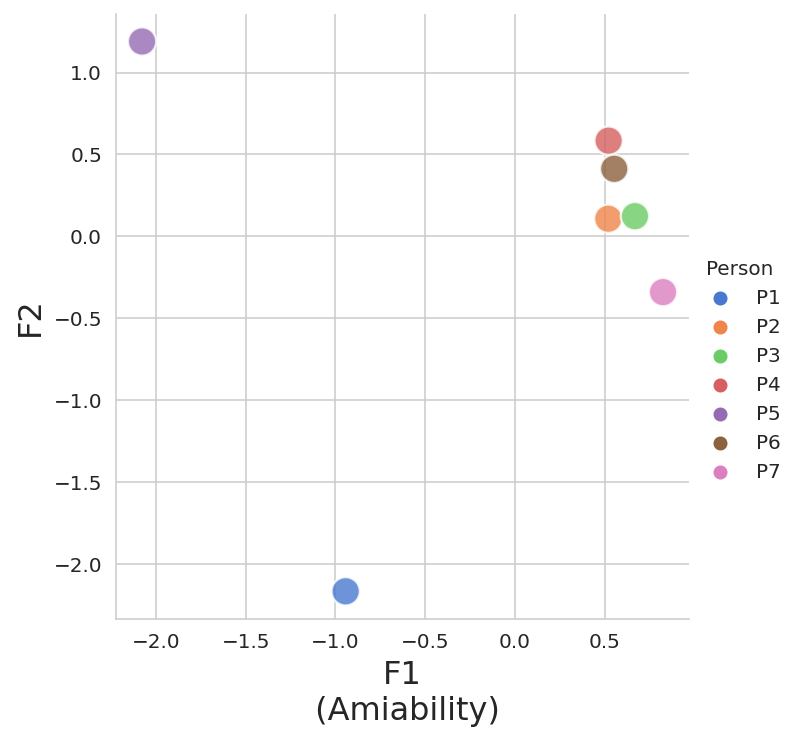

In [ ]:
sns.set_style({'axes.grid' : True})
sns.set_context({"axes.labelsize": '16'})
sns.relplot(data=scores_df, x="F1", y="F2", hue="Person", s=200, alpha=0.8, palette='muted')
plt.xlabel('F1\n (Amiability)', loc='right')
plt.ylabel('F2\n (Logical)', rotation=0, loc='top', labelpad=-10)
plt.xlim(-2.5,2.5); plt.ylim(-2.5,2.5)
plt.gca().spines[:].set_position('center');

## <font color='orange'>Your Turn: Customer preference data</font>

In [ ]:
np.set_printoptions(precision=4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#pd.set_option('display.precision', 4)

cus_df = pd.DataFrame(data=[[1,0.02,0.96,0.42,0.01],
                                [0.02,1.00,0.13,0.71,0.85],
                                [0.96,0.13,1,0.50,0.11],
                                [0.42,0.71,0.50,1,0.79],
                                [0.01,0.85,0.11,0.79,1]],
                          columns = ['Taste','GoodBuyForMoney','Flavor','SuitableForSnack','ProvidesLotsOfEnergy'],
                          index = ['P1','P2','P3','P4','P5'])
cus_df

,Taste,GoodBuyForMoney,Flavor,SuitableForSnack,ProvidesLotsOfEnergy
P1,1.0000,0.0200,0.9600,0.4200,0.0100
P2,0.0200,1.0000,0.1300,0.7100,0.8500
P3,0.9600,0.1300,1.0000,0.5000,0.1100
P4,0.4200,0.7100,0.5000,1.0000,0.7900
P5,0.0100,0.8500,0.1100,0.7900,1.0000


In [ ]:
eigval,eigvec=np.linalg.eig(cus_df.corr())
  
# Sort descendingly
sorted_eigval = -np.sort(-eigval)
sorted_eigval

array([4.5339e+00, 4.3455e-01, 2.8000e-02, 3.5302e-03, 3.0734e-17])

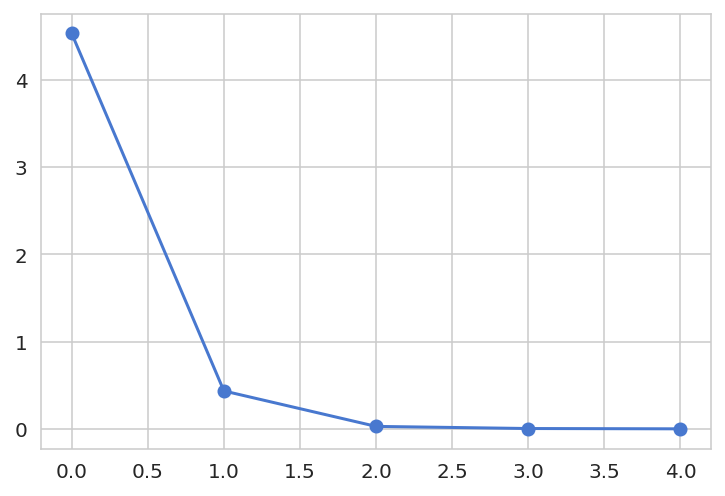

In [ ]:
plt.plot(sorted_eigval, '-o');

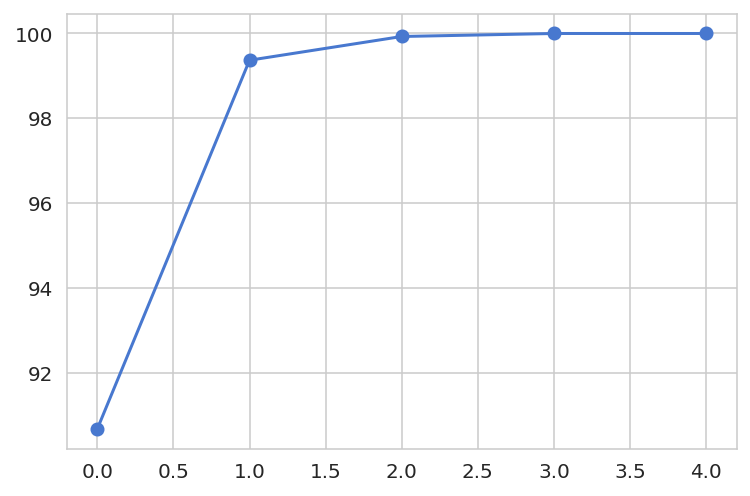

In [ ]:
plt.plot(np.cumsum(sorted_eigval)*100/len(sorted_eigval), '-o');

## If use number of factor =1
ANS Group Factor 1 is Good Buy For Money (F1= 0.9938) , SuitableForSnack(F1=0.74661), ProvidesLotsOfEnergy(F1=1.0031) 

In [ ]:

np.set_printoptions(precision=4)

NUM_FACTORS=1
fa = FactorAnalyzer(n_factors=1,  rotation=None, is_corr_matrix=False)

# Use method='principal'to get the same results as in the textbook.

fa.fit(cus_df)
print(fa.loadings_)

FactorAnalyzer(n_factors=1, rotation=None, rotation_kwargs={})

[[-0.9804]
 [ 0.9938]
 [-0.9673]
 [ 0.7466]
 [ 1.0031]]


In [ ]:
NUM_FACTORS=1
fa = FactorAnalyzer(n_factors=NUM_FACTORS,  rotation='varimax') 
fa.fit(cus_df)

FactorAnalyzer(n_factors=1, rotation='varimax', rotation_kwargs={})

In [ ]:
print(fa.loadings_)

[[-0.9804]
 [ 0.9938]
 [-0.9673]
 [ 0.7466]
 [ 1.0031]]


In [ ]:
fa.transform(cus_df)

array([[-3.    ],
       [ 0.1406],
       [ 0.9688],
       [-0.2656],
       [ 2.0625]])

In [ ]:
scores_df = pd.DataFrame(data=fa.transform(cus_df),
                         columns=['F'+str(i+1) for i in range(NUM_FACTORS)])
scores_df.set_index(cus_df.index, inplace=True)
scores_df.index.rename('Person', inplace=True)

In [ ]:
scores_df
scores_df.corr()

,F1
Person,
P1,-3.0000
P2,0.1406
P3,0.9688
P4,-0.2656
P5,2.0625


,F1
F1,1.0000


## If use number of factor =2
### ANS Group Factor 1 is Good Buy For Money (F1= 0.8602) , ProvidesLotsOfEnergy(F1=0.8092) 
### ANS Group Factor 2 is SuitableForSnack(F2=0.9273)


In [ ]:

np.set_printoptions(precision=4)

NUM_FACTORS=2
fa = FactorAnalyzer(n_factors=2,  rotation=None, is_corr_matrix=False)

# Use method='principal'to get the same results as in the textbook.

fa.fit(cus_df)
print(fa.loadings_)

FactorAnalyzer(n_factors=2, rotation=None, rotation_kwargs={})

[[-0.9783  0.2068]
 [ 0.9813 -0.076 ]
 [-0.9705  0.2333]
 [ 0.819   0.5699]
 [ 0.9949  0.0369]]


In [ ]:
# Create factor analysis object and perform factor analysis

from factor_analyzer import FactorAnalyzer


NUM_FACTORS=2
fa = FactorAnalyzer(n_factors=NUM_FACTORS,  rotation='varimax') 
fa.fit(cus_df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [ ]:
print(fa.loadings_)

[[-0.9299 -0.3675]
 [ 0.8602  0.4782]
 [-0.9381 -0.3411]
 [ 0.3684  0.9273]
 [ 0.8092  0.5799]]


In [ ]:
fa.transform(cus_df)

array([[-0.679 , -1.0289],
       [ 1.3732, -0.3715],
       [-1.2039, -0.5613],
       [-0.5056,  1.8538],
       [ 1.0235,  0.1085]])

In [ ]:
scores_df = pd.DataFrame(data=fa.transform(cus_df),
                         columns=['F'+str(i+1) for i in range(NUM_FACTORS)])
scores_df.set_index(cus_df.index, inplace=True)
scores_df.index.rename('Person', inplace=True)

In [ ]:
scores_df
scores_df.corr()

,F1,F2
Person,,
P1,-0.6790,-1.0289
P2,1.3732,-0.3715
P3,-1.2039,-0.5613
P4,-0.5056,1.8538
P5,1.0235,0.1085


,F1,F2
F1,1.0000,0.0075
F2,0.0075,1.0000


AttributeError: ignored

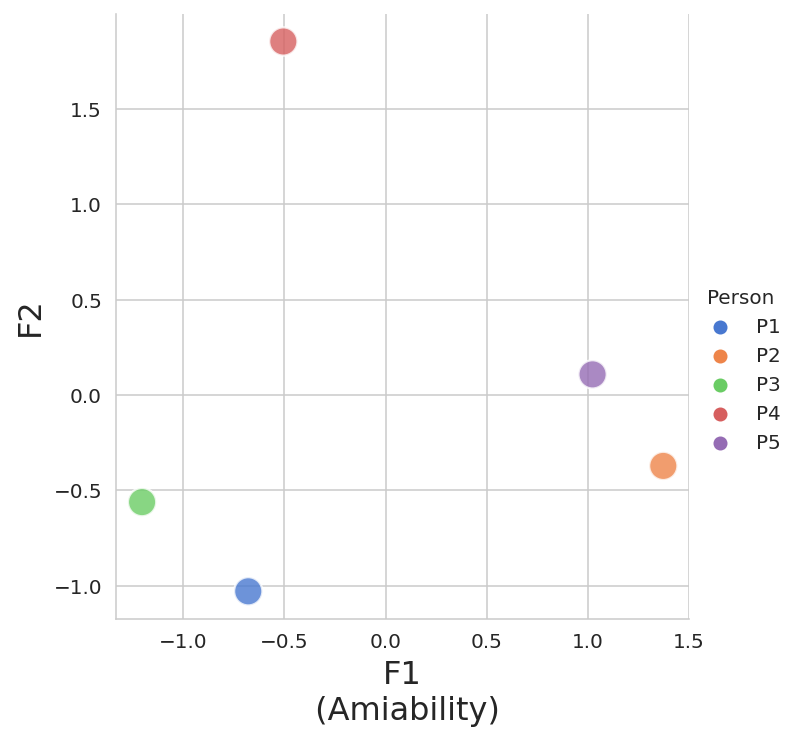

In [ ]:
sns.set_style({'axes.grid' : True})
sns.set_context({"axes.labelsize": '16'})
sns.relplot(data=scores_df, x="F1", y="F2", hue="Person", s=200, alpha=0.8, palette='muted')
plt.xlabel('F1\n (Amiability)', loc='right')
plt.ylabel('F2\n (Logical)', rotation=0, loc='top', labelpad=-10)
plt.xlim(-2.5,2.5); plt.ylim(-2.5,2.5)
plt.gca().spines[:].set_position('center');